In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
Senior_Citizen,0,0,0,0,0
Is_Married,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
Phone_Service,No,Yes,Yes,No,Yes
Dual,No phone service,No,No,No phone service,No
Internet_Service,DSL,DSL,DSL,DSL,Fiber optic
Online_Security,No,Yes,Yes,Yes,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

In [6]:
df.describe()

,Senior_Citizen,tenure,Monthly_Charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df = df.drop(columns=["customerID"])

In [8]:
df.head(2).T

,0,1
gender,Female,Male
Senior_Citizen,0,0
Is_Married,Yes,No
Dependents,No,No
tenure,1,34
Phone_Service,No,Yes
Dual,No phone service,No
Internet_Service,DSL,DSL
Online_Security,No,Yes
Online_Backup,Yes,No


In [9]:
df.columns

Index(['gender', 'Senior_Citizen ', 'Is_Married', 'Dependents', 'tenure',
       'Phone_Service', 'Dual', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df = df.rename(columns={'senior_citizen ': 'senior_citizen'})

In [12]:
df.columns

Index(['gender', 'senior_citizen', 'is_married', 'dependents', 'tenure',
       'phone_service', 'dual', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [13]:
numerical_features_list = ["tenure", "monthly_charges", "total_charges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())

gender ['Female' 'Male']
senior_citizen [0 1]
is_married ['Yes' 'No']
dependents ['No' 'Yes']
phone_service ['No' 'Yes']
dual ['No phone service' 'No' 'Yes']
internet_service ['DSL' 'Fiber optic' 'No']
online_security ['No' 'Yes' 'No internet service']
online_backup ['Yes' 'No' 'No internet service']
device_protection ['No' 'Yes' 'No internet service']
tech_support ['No' 'Yes' 'No internet service']
streaming_tv ['No' 'Yes' 'No internet service']
streaming_movies ['No' 'Yes' 'No internet service']
contract ['Month-to-month' 'One year' 'Two year']
paperless_billing ['Yes' 'No']
payment_method ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn ['No' 'Yes']


In [14]:
df.total_charges.mode()[0]

' '

In [15]:
df[df['total_charges']==' ']

,gender,senior_citizen,is_married,dependents,tenure,phone_service,dual,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
len(df[df["total_charges"]==" "])

11

In [17]:
print(f"shape of data before droping nulls {df.shape}")
df = df.loc[df['total_charges'] != ' '].copy()  # Create an explicit copy
df['total_charges'] = df['total_charges'].astype(float)
print(f"shape of data after droping {df.shape}")

shape of data before droping nulls (7043, 20)
shape of data after droping (7032, 20)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   is_married         7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   tenure             7032 non-null   int64  
 5   phone_service      7032 non-null   object 
 6   dual               7032 non-null   object 
 7   internet_service   7032 non-null   object 
 8   online_security    7032 non-null   object 
 9   online_backup      7032 non-null   object 
 10  device_protection  7032 non-null   object 
 11  tech_support       7032 non-null   object 
 12  streaming_tv       7032 non-null   object 
 13  streaming_movies   7032 non-null   object 
 14  contract           7032 non-null   object 
 15  paperless_billing  7032 non-null   object 
 16  payment_method     7032 non-n

In [19]:
df["churn"].value_counts()

,count
churn,
No,5163
Yes,1869


In [20]:
df["churn"] = df["churn"].replace({"Yes": 1, "No": 0})

<ipython-input-20-0b983076638c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["churn"] = df["churn"].replace({"Yes": 1, "No": 0})


In [21]:
df.head(3).T

,0,1,2
gender,Female,Male,Male
senior_citizen,0,0,0
is_married,Yes,No,No
dependents,No,No,No
tenure,1,34,2
phone_service,No,Yes,Yes
dual,No phone service,No,No
internet_service,DSL,DSL,DSL
online_security,No,Yes,Yes
online_backup,Yes,No,Yes


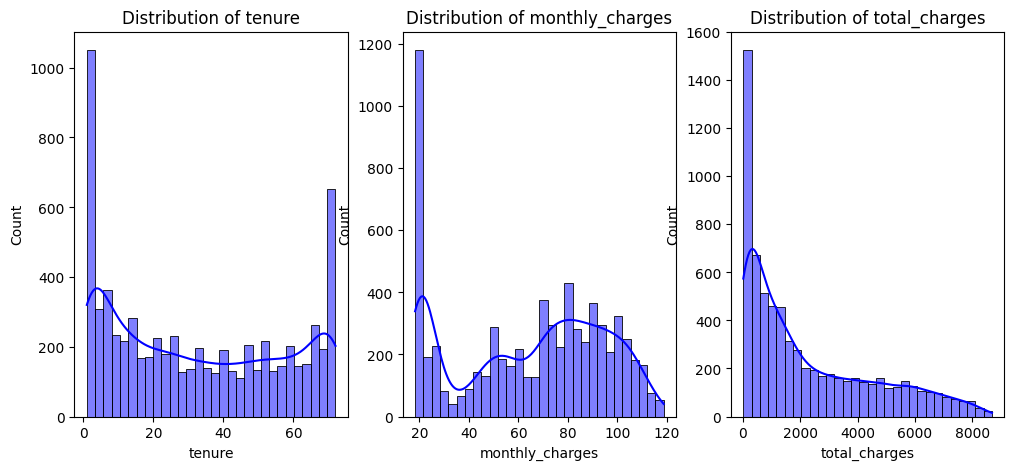

In [ ]:
numerical_features = ['tenure', 'monthly_charges', 'total_charges']
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.show()

# **Tenure (Left Plot)**

The distribution is somewhat skewed, indicating that many customers leave early, but those who stay tend to remain for a long time.

The distribution is bimodal, meaning it has two distinct peaks

# **Monthly Charges (Middle Plot)**

The distribution is right-skewed, meaning most customers have lower monthly charges, but some pay significantly more.

# **Total Charges (Right Plot)**

The distribution is highly right-skewed, meaning most customers have low total charges, while a few have very high total charges.
This is expected since total charges = monthly charges × tenure, so customers with low tenure naturally have low total charges.



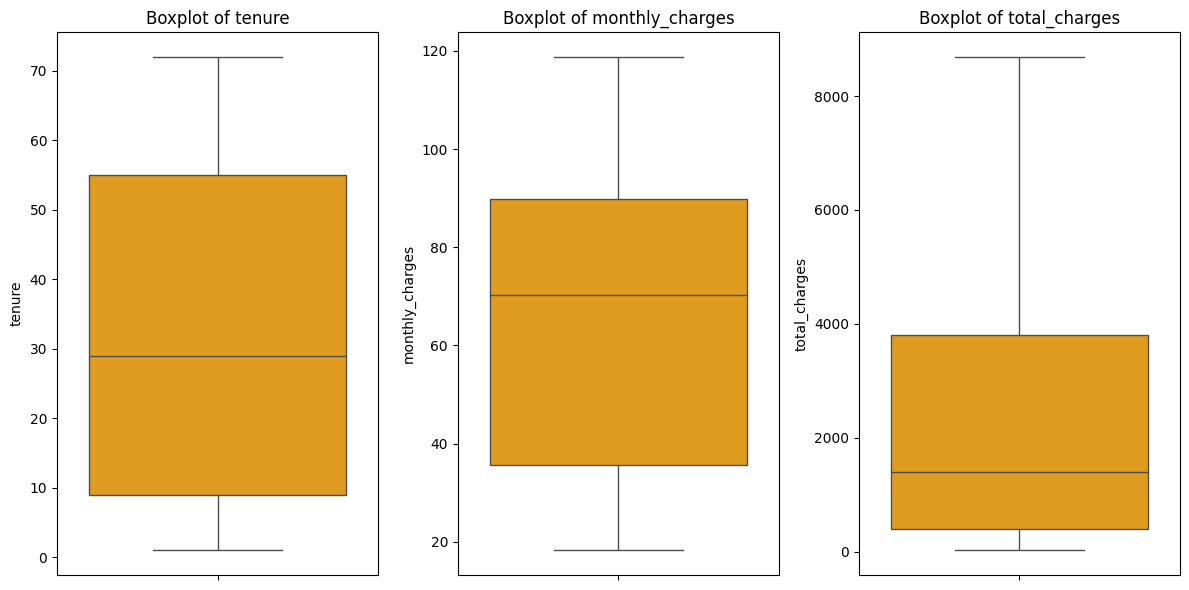

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# **Boxplot of Tenure (Left)**
The median (middle line) is around 30 months, meaning half of the customers have a tenure below this value.

The interquartile range (IQR) (box portion) extends from about 9 to 55 months, indicating that most customers fall within this range.

The minimum and maximum values show that some customers have very short tenure, while others stay for the full duration.

There don't seem to be significant outliers, meaning tenure values are relatively well-distributed.

# **Boxplot of Monthly Charges (Middle)**

The median monthly charge is around $70, meaning half of the customers pay below this amount.

The IQR spans from about 35 and 90 , meaning most customers pay within this range.

There are no obvious outliers, suggesting a relatively smooth distribution of pricing plans.

# **Boxplot of Total Charges (Right)**
The median total charge is around $2,000.

The IQR extends from about 400 to 4,000, meaning most customers' total charges fall within this range.

There is a long upper whisker, indicating that some customers have very high total charges, likely due to long tenure and high monthly charges.

The lower values show many customers with low total charges, likely those who left early.

In [ ]:
q1 = df['monthly_charges'].quantile(0.25)
q3 = df['monthly_charges'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df['monthly_charges'] < lower_bound) | (df['monthly_charges'] > upper_bound)]


print("Number of outliers in 'monthly_charges':", outliers.shape[0])


Number of outliers in 'monthly_charges': 0


In [ ]:
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]


print("Number of outliers in 'tenure':", outliers.shape[0])

In [ ]:
q1 = df['total_charges'].quantile(0.25)
q3 = df['total_charges'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df['total_charges'] < lower_bound) | (df['total_charges'] > upper_bound)]


print("Number of outliers in 'total_charges':", outliers.shape[0])


Number of outliers in 'total_charges': 0


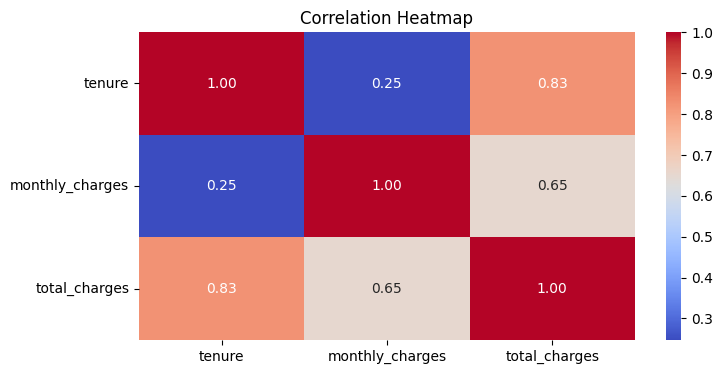

In [ ]:

plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "monthly_charges", "total_charges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Key Insights:**

Total Charges is mainly influenced by both tenure and monthly charges.

Tenure and Monthly Charges are relatively independent.

Customers who stay longer contribute more revenue over time

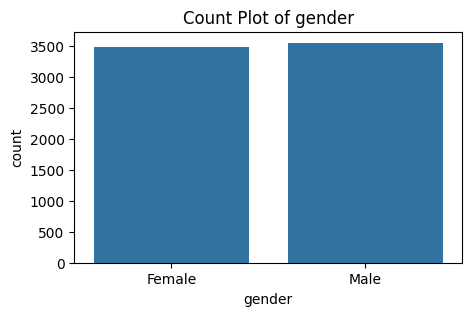

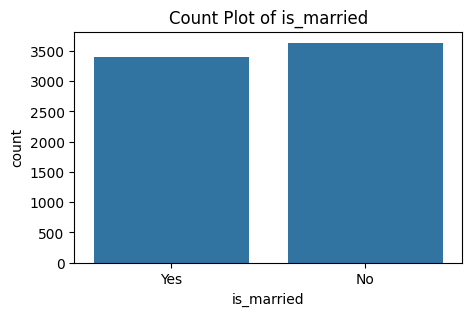

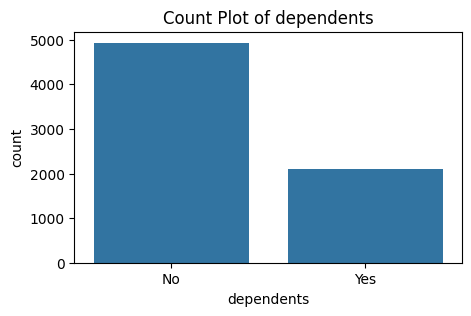

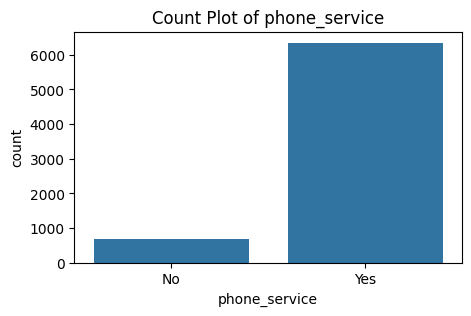

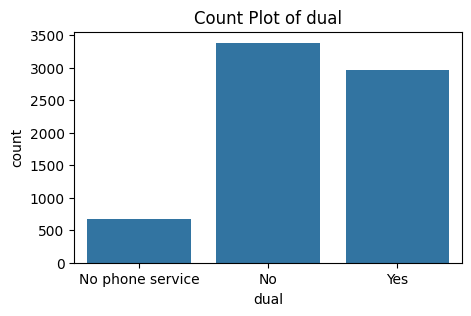

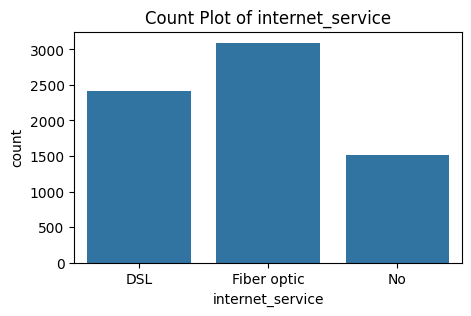

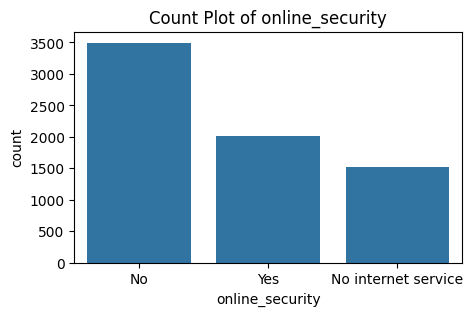

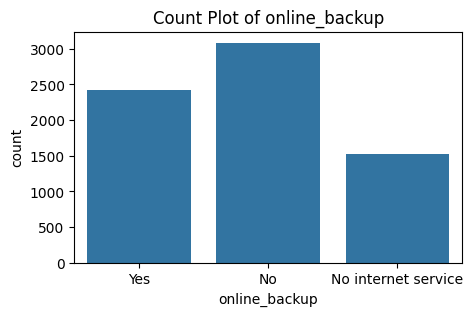

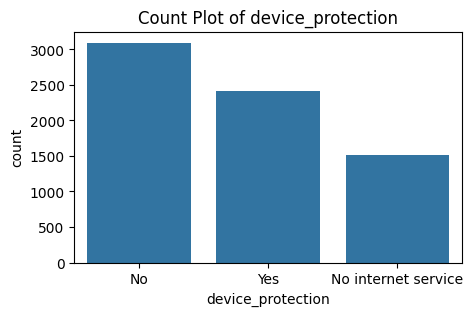

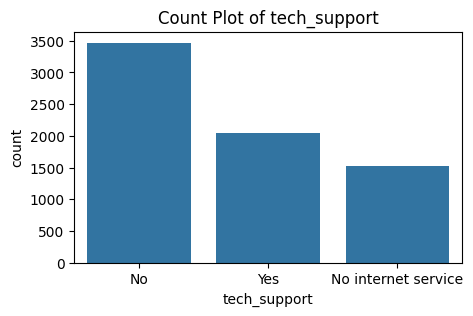

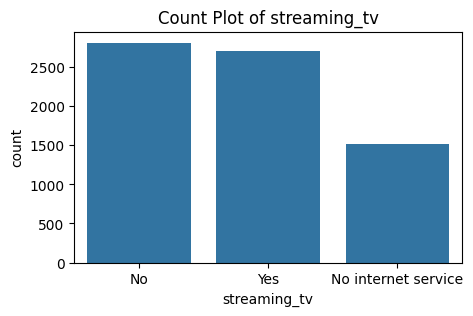

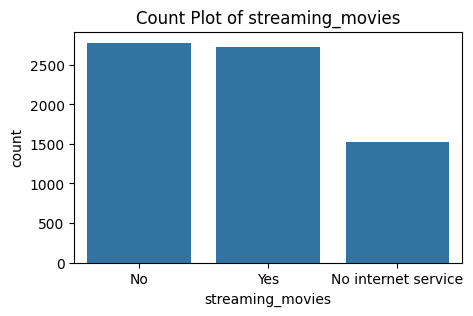

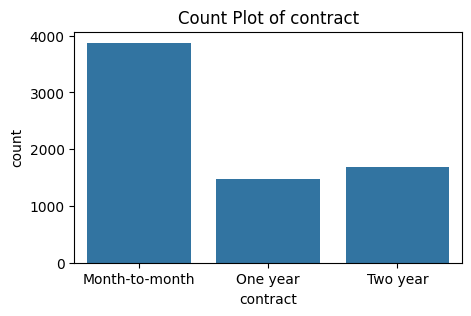

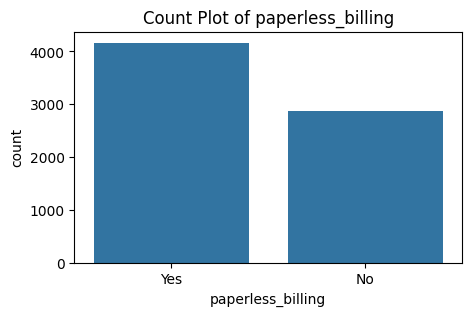

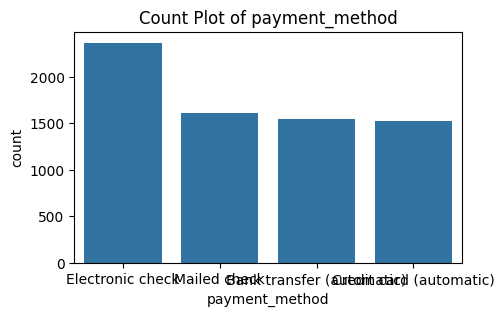

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [25]:
object_columns = df.select_dtypes(include="object").columns

In [26]:
object_columns

Index(['gender', 'is_married', 'dependents', 'phone_service', 'dual',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

In [27]:
columns_mappings = {
    'gender' : {'Female': 0, 'Male': 1},
    'is_married': {'No': 0, 'Yes': 1},
    'dependents': {'No': 0, 'Yes': 1},
    'phone_service': {'No': 0, 'Yes': 1},
    'paperless_billing': {'No': 0, 'Yes': 1},
    'contract' : {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'dual': {'No phone service': 0, 'No': 1, 'Yes': 2},
    'internet_service': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
    'online_security': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'online_backup': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'device_protection': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'tech_support': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'streaming_tv': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'streaming_movies': {'No internet service': 0, 'No': 1, 'Yes': 2},
    'contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'payment_method': {
        'Electronic check': 0,
        'Mailed check': 1,
        'Bank transfer (automatic)': 2,
        'Credit card (automatic)': 3
    }
}


In [ ]:
for col, mapping in columns_mappings.items():
    df[col] = df[col].map(mapping)

In [29]:
for col in object_columns:
    df[col] = df[col].astype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   int64  
 1   senior_citizen     7032 non-null   int64  
 2   is_married         7032 non-null   int64  
 3   dependents         7032 non-null   int64  
 4   tenure             7032 non-null   int64  
 5   phone_service      7032 non-null   int64  
 6   dual               7032 non-null   int64  
 7   internet_service   7032 non-null   int64  
 8   online_security    7032 non-null   int64  
 9   online_backup      7032 non-null   int64  
 10  device_protection  7032 non-null   int64  
 11  tech_support       7032 non-null   int64  
 12  streaming_tv       7032 non-null   int64  
 13  streaming_movies   7032 non-null   int64  
 14  contract           7032 non-null   int64  
 15  paperless_billing  7032 non-null   int64  
 16  payment_method     7032 non-n

In [31]:
df.head(2)

,gender,senior_citizen,is_married,dependents,tenure,phone_service,dual,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0


In [32]:
X = df.drop(columns=["churn"])
y = df["churn"]

In [33]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation , X_test , y_validation , y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.5 , random_state=42)

In [34]:
print('X train shape ', X_train.shape)
print('X validation shape ', X_validation.shape)
print('X test shape ' , X_test.shape)

X train shape  (5625, 19)
X validation shape  (703, 19)
X test shape  (704, 19)


In [35]:
print(y_train.value_counts())

churn
0    4130
1    1495
Name: count, dtype: int64


In [36]:
scale_cols = ["tenure", "total_charges", "monthly_charges"]
scaler = StandardScaler()

In [37]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_validation[scale_cols] = scaler.transform(X_validation[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [ ]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_sm.value_counts())

churn
1    4130
0    4130
Name: count, dtype: int64


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
models_params = {
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [ ]:
best_models = {}
model_results = [] 

for name, mp in models_params.items():
    print(f"Running Grid Search for {name}...")

    grid = GridSearchCV(mp["model"], mp["params"], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_sm, y_train_sm)

    best_models[name] = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_

    model_results.append((name, best_score, best_params))

    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best CV Accuracy: {best_score:.4f}\n")

Running Grid Search for SVM...
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8225

Running Grid Search for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best CV Accuracy: 0.8332

Running Grid Search for Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best CV Accuracy: 0.7868

Running Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 0.8427



In [ ]:
model_results

[('Random Forest',
  0.8427360774818402,
  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}),
 ('XGBoost',
  0.8331719128329297,
  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}),
 ('SVM', 0.8225181598062953, {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}),
 ('Decision Tree',
  0.7868038740920096,
  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2})]

In [ ]:
best_rf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=300, random_state=42)
best_rf.fit(X_train_sm, y_train_sm)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
y_val_pred = best_rf.predict(X_validation)

val_accuracy = accuracy_score(y_validation, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


print("Validation Confusion Matrix:")
print(confusion_matrix(y_validation, y_val_pred))


print("Validation Classification Report:")
print(classification_report(y_validation, y_val_pred))


Validation Accuracy: 0.7752
Validation Confusion Matrix:
[[436  92]
 [ 66 109]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       528
           1       0.54      0.62      0.58       175

    accuracy                           0.78       703
   macro avg       0.71      0.72      0.71       703
weighted avg       0.79      0.78      0.78       703



In [ ]:
y_test_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.7500
Test Confusion Matrix:
[[408  97]
 [ 79 120]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       505
           1       0.55      0.60      0.58       199

    accuracy                           0.75       704
   macro avg       0.70      0.71      0.70       704
weighted avg       0.76      0.75      0.75       704



In [ ]:
best_models_2 = {}
model_results_2 = []  

for name, mp in models_params.items():
    print(f"Running Grid Search for {name}...")

    grid = GridSearchCV(mp["model"], mp["params"], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_

    model_results.append((name, best_score, best_params))

    print(f"Best Parameters for {name}: {best_params}")
    print(f"Best CV Accuracy: {best_score:.4f}\n")

Running Grid Search for SVM...
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8052

Running Grid Search for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:47:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV Accuracy: 0.8071

Running Grid Search for Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Best CV Accuracy: 0.7712

Running Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.8064



In [ ]:
best_rf_without_SMOTE = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=42)
best_rf_without_SMOTE.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
y_val_pred = best_rf_without_SMOTE.predict(X_validation)


val_accuracy = accuracy_score(y_validation, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


print("Validation Confusion Matrix:")
print(confusion_matrix(y_validation, y_val_pred))


print("Validation Classification Report:")
print(classification_report(y_validation, y_val_pred))


Validation Accuracy: 0.8165
Validation Confusion Matrix:
[[485  43]
 [ 86  89]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       528
           1       0.67      0.51      0.58       175

    accuracy                           0.82       703
   macro avg       0.76      0.71      0.73       703
weighted avg       0.81      0.82      0.81       703



In [ ]:
y_test_pred = best_rf_without_SMOTE.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7727
Test Confusion Matrix:
[[450  55]
 [105  94]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       505
           1       0.63      0.47      0.54       199

    accuracy                           0.77       704
   macro avg       0.72      0.68      0.69       704
weighted avg       0.76      0.77      0.76       704



In [ ]:
best_rf_weighted_without_SMOTE = RandomForestClassifier(
    max_depth=10,
    min_samples_split=5,
    n_estimators=100,
    class_weight="balanced",  
    random_state=42
)
best_rf_weighted_without_SMOTE.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [ ]:
y_train_pred = best_rf_weighted_without_SMOTE.predict(X_train)

trian_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Trian Accuracy: {trian_accuracy:.4f}")

Trian Accuracy: 0.8580


In [ ]:
y_val_pred = best_rf_weighted_without_SMOTE.predict(X_validation)


val_accuracy = accuracy_score(y_validation, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

print("Validation Confusion Matrix:")
print(confusion_matrix(y_validation, y_val_pred))


print("Validation Classification Report:")
print(classification_report(y_validation, y_val_pred))

Validation Accuracy: 0.7809
Validation Confusion Matrix:
[[423 105]
 [ 49 126]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       528
           1       0.55      0.72      0.62       175

    accuracy                           0.78       703
   macro avg       0.72      0.76      0.73       703
weighted avg       0.81      0.78      0.79       703



In [ ]:
y_test_pred = best_rf_weighted_without_SMOTE.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7344
Test Confusion Matrix:
[[386 119]
 [ 68 131]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       505
           1       0.52      0.66      0.58       199

    accuracy                           0.73       704
   macro avg       0.69      0.71      0.69       704
weighted avg       0.76      0.73      0.74       704



In [38]:
best_xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, use_label_encoder=False, eval_metric="logloss")
best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = best_xgb.predict(X_train)


trian_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Trian Accuracy: {trian_accuracy:.4f}")

Trian Accuracy: 0.8222


In [ ]:
y_val_pred = best_xgb.predict(X_validation)


val_accuracy = accuracy_score(y_validation, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


print("Validation Confusion Matrix:")
print(confusion_matrix(y_validation, y_val_pred))

print("Validation Classification Report:")
print(classification_report(y_validation, y_val_pred))

Validation Accuracy: 0.8151
Validation Confusion Matrix:
[[484  44]
 [ 86  89]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       528
           1       0.67      0.51      0.58       175

    accuracy                           0.82       703
   macro avg       0.76      0.71      0.73       703
weighted avg       0.80      0.82      0.81       703



In [ ]:
y_test_pred = best_xgb.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7841
Test Confusion Matrix:
[[452  53]
 [ 99 100]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       505
           1       0.65      0.50      0.57       199

    accuracy                           0.78       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.77      0.78      0.77       704



In [ ]:
scale_cols = ["tenure", "total_charges", "monthly_charges"]

In [ ]:
pickle.dump(best_xgb,open('saved/best_xgb.pkl','wb'))
pickle.dump(best_rf,open('saved/best_rf.pkl','wb'))
pickle.dump(best_rf_without_SMOTE,open('saved/best_rf_without_SMOTE.pkl','wb'))
pickle.dump(scaler,open('saved/scaler.pkl','wb'))
pickle.dump(columns_mappings,open('saved/columns_mappings.pkl','wb'))
pickle.dump(scale_cols,open('saved/scale_cols.pkl','wb'))

In [ ]:
with open("saved/best_xgb.pkl", "rb") as f:
    XGboost_model = pickle.load(f)

with open("saved/scaler.pkl", "rb") as f:
    Scaler_loaded = pickle.load(f)

with open("saved/columns_mappings.pkl", "rb") as f:
    columns_mappings = pickle.load(f)

with open("saved/scale_cols.pkl", "rb") as f:
    scale_cols = pickle.load(f)

c:\Users\Wasseem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
input_data = {
    'gender': 'Male',
    'senior_citizen': 0,
    'is_married':'No',
    'dependents': 'No',
    'tenure': 34,
    'phone_service': 'Yes',
    'dual': 'No',
    'internet_service': 'DSL',
    'online_security': 'Yes',
    'online_backup': 'No',
    'device_protection': 'Yes',
    'tech_support': 'No',
    'streaming_tv': 'No',
    'streaming_movies': 'No',
    'contract': 'One year',
    'paperless_billing': 'No',
    'payment_method': 'Mailed check',
    'monthly_charges': 56.95,
    'total_charges': 1889.5
}

In [ ]:
input_data_df = pd.DataFrame([input_data])

In [ ]:
input_data_df.columns = input_data_df.columns.str.lower()

In [ ]:
for col, mapping in columns_mappings.items():
    input_data_df[col] = input_data_df[col].map(mapping)

In [ ]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1 non-null      int64  
 1   senior_citizen     1 non-null      int64  
 2   is_married         1 non-null      int64  
 3   dependents         1 non-null      int64  
 4   tenure             1 non-null      int64  
 5   phone_service      1 non-null      int64  
 6   dual               1 non-null      int64  
 7   internet_service   1 non-null      int64  
 8   online_security    1 non-null      int64  
 9   online_backup      1 non-null      int64  
 10  device_protection  1 non-null      int64  
 11  tech_support       1 non-null      int64  
 12  streaming_tv       1 non-null      int64  
 13  streaming_movies   1 non-null      int64  
 14  contract           1 non-null      int64  
 15  paperless_billing  1 non-null      int64  
 16  payment_method     1 non-null 

In [ ]:
input_data_df[scale_cols] = Scaler_loaded.transform(input_data_df[scale_cols])

In [ ]:
input_data_df.head(2)

,gender,senior_citizen,is_married,dependents,tenure,phone_service,dual,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,1,0,0,0,0.067851,1,1,1,2,1,2,1,1,1,1,0,1,-0.256782,-0.17034


In [ ]:
# make a prediction
prediction = XGboost_model.predict(input_data_df)
pred_prob = XGboost_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")
print(f"True label is 0 so it is not Churn")

[0]
Prediction: No Churn
Prediciton Probability: [[0.9712117  0.02878832]]
True label is 0 so it is not Churn
